In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import librosa
import scipy 
import dippykit
import sys

In [8]:
df = pd.read_csv('ABPsys.csv')
df.head()

,'[08:16:10 26/10/1994]',95.000
0,'[08:16:11 26/10/1994]',95.0
1,'[08:16:12 26/10/1994]',95.0
2,'[08:16:13 26/10/1994]',95.0
3,'[08:16:14 26/10/1994]',94.0
4,'[08:16:15 26/10/1994]',95.0


In [9]:
X = df.iloc[:,1].values
print(X)

[ 95.  95.  95.  94.  95.  97.  98.  99. 101. 102. 102. 103. 104. 105.
 104. 103. 102. 102. 102. 100. 100. 101. 103. 103. 104. 106. 106. 109.
 110. 111. 111. 116. 117. 120. 121. 123. 125. 125. 121. 121. 120. 120.
 119. 119. 115. 114. 114. 113. 115. 115. 115. 114. 113. 115. 114. 116.
 114. 113.]


In [10]:
pq = X.flatten()
print(pq)

[ 95.  95.  95.  94.  95.  97.  98.  99. 101. 102. 102. 103. 104. 105.
 104. 103. 102. 102. 102. 100. 100. 101. 103. 103. 104. 106. 106. 109.
 110. 111. 111. 116. 117. 120. 121. 123. 125. 125. 121. 121. 120. 120.
 119. 119. 115. 114. 114. 113. 115. 115. 115. 114. 113. 115. 114. 116.
 114. 113.]


In [11]:
#curve_fitting_model
CountInitial = len(pq)*64
a = librosa.lpc(pq, order=10)
b = np.hstack([[0], -1 * a[1:]])
pq_hat = scipy.signal.lfilter(b, [1], pq)
err = np.abs(pq-pq_hat)
Err = (np.around(err, decimals=1))*10
Err = Err.astype(np.int64)
Err = pq
Err = Err.astype(np.int64)
print(Err)

[ 95  95  95  94  95  97  98  99 101 102 102 103 104 105 104 103 102 102
 102 100 100 101 103 103 104 106 106 109 110 111 111 116 117 120 121 123
 125 125 121 121 120 120 119 119 115 114 114 113 115 115 115 114 113 115
 114 116 114 113]


In [12]:
import math
MSE = np.square(np.subtract(pq,pq_hat)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

13.558870299468714


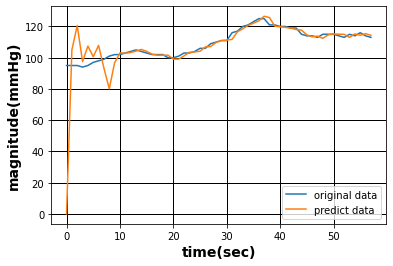

In [14]:
plt.plot(pq,label='original data')
plt.xlabel('time(sec)',weight='bold',fontsize=14.0)
plt.ylabel('magnitude(mmHg)',weight='bold',fontsize=14.0)
plt.plot(pq_hat,label='predict data')
plt.legend()
plt.grid(color='black',which='both', linestyle='-', linewidth=1)
plt.show()

In [8]:
#Run Length Encoding
from collections import OrderedDict
def runLengthEncoding(input):
 
    # Generate ordered dictionary of all lower
    # case alphabets, its output will be
    # dict = {'w':0, 'a':0, 'd':0, 'e':0, 'x':0}
    dict=OrderedDict.fromkeys(input, 0)
 
    # Now iterate through input string to calculate
    # frequency of each character, its output will be
    # dict = {'w':4,'a':3,'d':1,'e':1,'x':6}
    for ch in input:
        dict[ch] += 1
 
    # now iterate through dictionary to make
    # output string from (key,value) pairs
    output = ''
    for key,value in dict.items():
        output = output + key + str(value)
    return output
 
# Driver function
if __name__ == "__main__":
    code=runLengthEncoding(str(err))
    print (code)
    le=len(code)
    print(le)
    #leDe=len(str(Err))
    #print(leDe)
    cr=(le/CountInitial)
    print(cr)
    ec=(1-(cr))*100
    print(ec)
    

[1953.585440142e58+32191 57652257846456748349
14-26]1
53
0.014278017241379311
98.57219827586206


In [9]:
im_encoded, stream_length, symbol_code_dict, symbol_prob_dict = dippykit.huffman_encode(Err)
print(stream_length)
Tra = np.unpackbits(im_encoded)
im_decoded_temp = dippykit.huffman_decode(im_encoded, symbol_code_dict)
im_decoded = im_decoded_temp[:-2]
CountInitial = len(pq)*64
CR = (stream_length/CountInitial)
print(CountInitial)
print(stream_length)
print(CR)
pc=1/CR
print(pc)
EC = (1-(CR))*100
print(EC)

258
3712
258
0.06950431034482758
14.387596899224807
93.04956896551724


In [10]:
def longest_common_substring(s1, s2):
    # go along the first string and search for the longest match
    maxLongest = 0
    offset = 0
    for i in range(0, len(s1)):
        longest = 0
        if ((i == len(s1) - len(s2) - 2)):
            break            
        for j in range(0, len(s2)):
            if (i+j < len(s1)):
                if s1[i+j] == s2[j]:
                    longest = longest + 1
                    if (maxLongest < longest):
                        maxLongest = longest
                        offset = i
                else:
                    break
            else:
                break
    return maxLongest, offset

    
def encode_lzw(text):

    dictionary = dict()
    # prepare the dictionary with the starting alphabet
    i = 0
    index = 1
    while i < len(text):
        if text[i] in dictionary:
            i = i + 1
        else:
            dictionary[text[i]] = index
            index = index + 1

    # encode the text
    i = 0
    encoded = []
    while i < len(text):
        j = 0
        stringToBeSaved = text[i]
        # while the stringToBeSaved is in the dictionary and we are not in the end of the string
        while stringToBeSaved in dictionary and i+j < len(text):
            # save longest dictionary occurence's index
            indexInDictionary = dictionary[stringToBeSaved]
            length = len(stringToBeSaved)
            if (i+j == len(text) - 1):
                break
            j = j + 1
            stringToBeSaved = stringToBeSaved + text[i+j]
        i = i + length
        #print ("<{0}>".format(indexInDictionary))
        encoded.append(indexInDictionary)
        if (stringToBeSaved not in dictionary):
            dictionary[stringToBeSaved] = index
        index = index + 1

    return encoded, dictionary
        
def decode_lzw(encoded, dictionary):
    i = 0
    while i < len(encoded):
        print(list(dictionary.keys())[list(dictionary.values()).index(encoded[i])], end="")
        i = i+1
    print('\n')
    

if __name__ == "__main__":
    #if (len(sys.argv) != 2):
        #exit("You must specify the text which will be encoded! (Run with python3 lz77.py abracadabra)")
    #stringToEncode = ' '.join(sys.argv[1:2])
    [encoded, dictionary] = encode_lzw(str(err))
    #print("Encoded string: ", encoded)
    #print("Decoded string: ", end = "")
    decode_lzw(encoded, dictionary)
    leZ=(len(encoded)+len(dictionary))
    print(leZ)
    #leDeZ=len(str(Err))
    #print(leDeZ)
    cr2=(leZ/CountInitial)
    print(cr2)
    ec2=(1-(cr2))*100
    print(ec2)
    

[9.50000000e+01 9.96928559e+00 2.56421576e+01 3.51090332e+00
 1.24487961e+01 3.63394842e+00 9.88621946e+00 5.63937309e+00
 2.09199107e+01 5.23465131e+00 1.08677742e+00 1.17150677e-01
 6.86749356e-01 7.79658747e-01 1.30486241e+00 1.06450579e+00
 3.25632180e-01 4.11027085e-01 3.89197532e-01 1.60637183e+00
 8.49110444e-01 1.92773774e+00 1.86588682e+00 4.90956510e-01
 3.13573993e-01 1.88130139e+00 9.20590994e-01 1.80718270e+00
 2.34007520e-01 6.63464695e-02 2.10514744e-01 4.22943385e+00
 4.50920271e-01 1.48826172e+00 3.94904160e-01 9.18609329e-01
 1.42408512e+00 1.54200936e+00 4.68840538e+00 7.83705023e-01
 2.07768897e-01 6.05651203e-01 1.07964151e-01 9.62691209e-01
 2.61724100e+00 5.88227118e-01 6.36657547e-01 8.09662994e-01
 2.62442236e+00 3.57148139e-01 2.00677224e-01 1.05343467e+00
 1.97504848e+00 1.96528433e+00 1.22374283e+00 1.65456593e+00
 1.41638828e+00 1.29727844e+00]

883
0.23787715517241378
76.21228448275862


In [11]:
import string
import random
from collections import Counter
import time

# Arithmetic Encoding
def ac_encode(txt):

    res = Counter(txt)

    # characters
    chars = list(res.keys())

    # frequency of characters
    freq = list(res.values())

    probability = []
    for i in freq:
        probability.append(i / len(txt))

    #print(chars)
    #print(probability)

    high = 1.0
    low = 0.0
    for c in txt:
        diff = high - low
        index = chars.index(c)
        for i in range(index):
            high = low + diff * probability[i]
            low = high

        high = low + diff * probability[index]
        #print(f'char {c} -> Low: {low}   High: {high}')

    tag = (low+high)/2.0

    #print('Input: ' + txt)
    #print(str(low) + '< codeword <' + str(high))
    #print('codeword = ' + str(tag))

    with open('encode.ac', 'w') as fw:
        for i in chars:
            fw.write(i + ' ')
        fw.write('\n')

        for i in probability:
            fw.write(str(i) + ' ')
        fw.write('\n')

        fw.write(str(tag))

    return chars, probability, tag


# Arithmetic Decoding
def ac_decode(chars, probability, tag):
    high = 1.0
    low = 0.0
    output = ''
    c = ''
    while (c != '$'):
        diff = high - low
        for i in range(len(chars)):
            high = low + diff * probability[i]
            if low < tag < high:
                break
            else:
                low = high

        c = chars[i]
        output += c

    return output


def arithmetic_coding(input):
    if '$' in input:
        input = input[0:input.index('$')]
    if input[-1] != '$':
        input += '$'

    #print('Input: ' + input)

    start = time.time()
    (chars, probability, tag) = ac_encode(input)
    output = ac_decode(chars, probability, tag)
    end = time.time()

    #print('Decode: ' + output)

    #print('does match :  ' + str(input == output))
    #print(f"Total Time: {end - start} sec\n\n")
    return input == output
ArEn=ac_encode(str(err))
leAr=(len(ArEn[0])+len(str(ArEn[1]))+len(str(ArEn[1])))
print(leAr)
#le=len(str(Err))
CountInitial = len(pq)*64
cr3=(leAr/CountInitial)
print(cr3)
ec3=(1-(cr3))*100
print(ec3)

780
0.2101293103448276
78.98706896551724


[1500.0, 1498.7, 1497.4, 1496.1, 1494.8, 1493.5, 1492.2, 1490.9, 1489.6, 1488.3, 1487.0, 1485.7, 1484.4, 1483.1, 1481.8, 1480.5, 1479.2, 1477.9, 1476.6, 1475.3, 1474.0, 1472.7, 1471.4, 1470.1, 1468.8, 1467.5, 1466.2, 1464.9, 1463.6, 1462.3, 1461.0, 1459.7, 1458.4, 1457.1]
[1500.0, 1498.7, 1497.4, 1496.1, 1494.8, 1493.5, 1492.2, 1490.9, 1489.6, 1488.3, 1487.0, 1485.7, 1484.4, 1483.1, 1481.8, 1480.5, 1479.2, 1477.9, 1476.6, 1475.3, 1474.0, 1472.7, 1471.4, 1470.1, 1468.8, 1467.5, 1466.2, 1464.9, 1463.6, 1462.3, 1461.0, 1459.7, 1458.4, 1457.1, 1455.8, 1454.5, 1453.2, 1451.9, 1450.6, 1449.3, 1448.0, 1446.7, 1445.4, 1444.1, 1442.8, 1441.5, 1440.2, 1438.9, 1437.6, 1436.3, 1435.0, 1433.7, 1432.4, 1431.1, 1429.8, 1428.5, 1427.2, 1425.9, 1424.6, 1423.3, 1422.0, 1420.7, 1419.4, 1418.1, 1416.8, 1415.5, 1414.2, 1412.9, 1411.6, 1410.3, 1409.0, 1407.7, 1406.4, 1405.1, 1403.8, 1402.5, 1401.2, 1399.9, 1398.6, 1397.3, 1396.0, 1394.7, 1393.4, 1392.1, 1390.8, 1389.5, 1388.2, 1386.9, 1385.6, 1384.3, 1383.0

<Figure size 432x288 with 0 Axes>

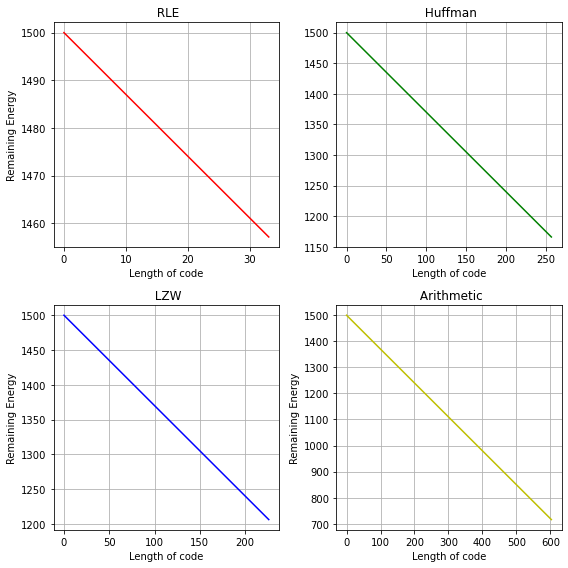

In [10]:
time=0
E0=1500
Ecapture=0.3
Esend=1
ER_RLE = [ E0-(time*Esend)-(time*Ecapture) for time in range(le) ]
ER_Huff=[ E0-(time*Esend)-(time*Ecapture) for time in range(stream_length) ]
ER_LZW=[ E0-(time*Esend)-(time*Ecapture) for time in range(leZ) ]
ER_Arith=[ E0-(time*Esend)-(time*Ecapture) for time in range(leAr) ]

print(ER_RLE)
print(ER_Huff)
print(ER_LZW)
print(ER_Arith)

plt.figure()
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),tight_layout=True)
fig.tight_layout()
plt.subplot(221)
plt.plot(ER_RLE,label='Remaining Energy of Arithmetic',color="r")
plt.title(' RLE')
plt.xlabel('Length of code')
plt.ylabel('Remaining Energy')
plt.grid(True)
######
plt.subplot(222)
plt.plot(ER_Huff,label='Remaining Energy of Huffman',color="g")
plt.title(' Huffman')
plt.xlabel('Length of code')
plt.grid(True)
#######
plt.subplot(223)
plt.plot(ER_LZW,label='Remaining Energy of LZW',color="b")
plt.title(' LZW')
plt.xlabel('Length of code')
plt.ylabel('Remaining Energy')
plt.ylabel('Remaining Energy')
plt.grid(True)
######
plt.subplot(224)
plt.plot(ER_Arith,label='Remaining Energy of ARithmetic',color="y")
plt.title(' Arithmetic')
plt.xlabel('Length of code')
plt.ylabel('Remaining Energy')
plt.grid(True)

plt.show()

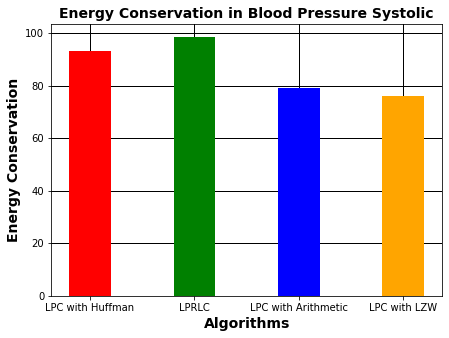

In [13]:
import numpy as np
import matplotlib.pyplot as plt
  
# creating the dataset
algorithms = ['LPC with Huffman', 'LPRLC', 'LPC with Arithmetic',
        'LPC with LZW']
energy=[EC,ec,ec3,ec2]
c = ['red', 'green', 'blue', 'orange']  
fig = plt.figure(figsize = (7, 5)) 
# creating the bar plot
plt.grid(zorder=0)
plt.bar(algorithms, energy, color = c,
        width = 0.4,zorder=3)

plt.xlabel("Algorithms",weight='bold',fontsize=14.0)
plt.ylabel("Energy Conservation",weight='bold',fontsize=14.0)
plt.title("Energy Conservation in Blood Pressure Systolic",weight='bold',fontsize=14.0)
plt.grid(color='black',which='both', linestyle='-', linewidth=1)
plt.show()